In [15]:
import pandas as pd
df_train = pd.read_csv("train_merged[961-1120].csv")
df_test = pd.read_csv("test_merged[961-1120].csv")

In [2]:
df_train.head()

,user_id,merchant_id,label,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,344706,1825,0,1056812,451,472,2471.0,1103,0,5.0,0.0
1,344706,1825,0,1067615,451,3334,6352.0,1103,0,5.0,0.0
2,344706,1825,0,726039,276,2026,3979.0,1103,0,5.0,0.0
3,344706,1825,0,844714,451,472,2471.0,1103,0,5.0,0.0
4,344706,1825,0,329731,1344,327,1954.0,808,0,5.0,0.0


In [3]:
df_test.head()

,user_id,merchant_id,prob,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,284802,2173,NaN,643289,612,141,3614.0,828,0,0.0,2.0
1,284802,2173,NaN,570805,1577,141,3614.0,828,0,0.0,2.0
2,284802,2173,NaN,658620,302,606,376.0,828,0,0.0,2.0
3,284802,2173,NaN,262870,662,606,376.0,828,3,0.0,2.0
4,284802,2173,NaN,934812,612,141,3614.0,828,3,0.0,2.0


<AxesSubplot:>

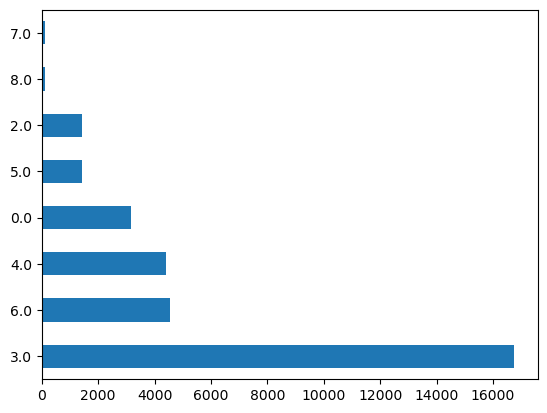

In [23]:
df_train['age_range'].value_counts().plot(kind='barh')